<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<a href="../../../../Index.ipynb"><< Index</a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2023 EUMETSAT <br>
**License:** MIT <br>
**Authors:** Ben Loveday (EUMETSAT/Innoflair UG), Hayley Evers-King (EUMETSAT)

<html>
  <div style="width:100%">
    <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fapplications%2ocean-case-studies/HEAD?urlpath=%2Ftree%2FCase_studies%2FOcean_phenomena%2FBasin_scale_variability%2FAtlantic_Med_SST_anomalies_MHW_2023%2FAtlantic_Med_MHW_2023.ipynb"><img src="https://mybinder.org/badge_logo.svg" alt="Open in Binder"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://jupyterhub-wekeo.apps.eumetsat.dpi.wekeo.eu/hub/user-redirect/lab/tree/public/wekeo4oceans/ocean-case-studies/Case_studies/Ocean_phenomena/Basin_scale_variability/Atlantic_Med_SST_anomalies_MHW_2023/Atlantic_Med_MHW_2023.ipynb"><img src="https://img.shields.io/badge/launch-WEKEO-1a4696.svg?style=flat&logo=" alt="Open in WEkEO"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div> 
</html>

<div class="alert alert-block alert-success">
<h3>Ocean case studies</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>

This notebook has the following prerequisites:
- **<a href="https://eoportal.eumetsat.int/" target="_blank">A EUMETSAT Earth Observation Portal account</a>** to download data from the EUMETSAT Data Store
    
....
    
</div>
<hr>

# Marine heatwaves in the Mediterranean Sea in 2023

### Data used

| Product Description | Data Store collection ID| Product Navigator | WEkEO HDA ID | WEkEO metadata |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:-----------------:|
| Global OSTIA SST (Reprocessed) | - | - | EO:MO:DAT:SST_GLO_SST_L4_REP_OBSERVATIONS_010_011 | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AMO%3ADAT%3ASST_GLO_SST_L4_REP_OBSERVATIONS_010_011" target="_blank">link</a> |
| Global OSTIA SST (Near real-time) | - | - | EO:MO:DAT:SST_GLO_SST_L4_NRT_OBSERVATIONS_010_001 | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AMO%3ADAT%3ASST_GLO_SST_L4_NRT_OBSERVATIONS_010_001" target="_blank">link</a> |

### Learning outcomes

At the end of this notebook you will know how to;
* use satellite SST data to investigate marine heatwaves

### Outline

**REWRITE**

<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a>Contents

</div>

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../../README.md" target="_blank">README</a>**.

In [1]:
import xarray as xr
import os
import glob
import matplotlib.pyplot as plt # a library the provides plotting capability
import numpy as np
import datetime
import pandas

In [2]:
# Xarray version of Hobday et al.
from xmhw.xmhw import detect, threshold

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Setting notebook parameters
[Back to top](#TOC-TOP)

</div>

In [3]:
download_dir = os.path.join(os.getcwd(), "products")
tags = ["NRT", "MY"]

# First run
start_year = {"NRT" : 2007, "MY" : 2007}
end_year = {"NRT" : 2020, "MY" : 2020}
history_length = 2000 # days

# Second run
#start_year = {"NRT" : 2010, "MY" : 2010}
#end_year = {"NRT" : 2023, "MY" : 2023}
#history_length = 500 # days

<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Acquiring our SST data set
[Back to top](#TOC-TOP)

</div>

Use the data we downloaded previously in **<a href="../../Atlantic_Med_SST_anomalies_2023.ipynb" target="_blank">Sea surface temperature anomalies in the Northern Atlantic and Mediterranean Sea in 2023</a>**

In [4]:
heatwaves = {}
for tag in tags:
    print('----')
    heatwaves[tag] = {}
    TS_files = glob.glob(os.path.join(download_dir,f"TS_*_{tag}.nc"))
    for TS_file in sorted(TS_files):
        if any(year in os.path.basename(TS_file).split('_')[1] for year in [str(ii) for ii in range(start_year[tag], end_year[tag]+1)]):
            print(f"Including {os.path.basename(TS_file)}")
        else:
            TS_files.remove(TS_file)
    DS = xr.open_mfdataset(TS_files)
    DS["DoY"]=(['time'], np.array(DS.time.dt.dayofyear)-1)
    heatwaves[tag][f"dataset"] = DS

----
Including TS_2007_NRT.nc
Including TS_2008_NRT.nc
Including TS_2009_NRT.nc
Including TS_2010_NRT.nc
Including TS_2011_NRT.nc
Including TS_2012_NRT.nc
Including TS_2013_NRT.nc
Including TS_2014_NRT.nc
Including TS_2015_NRT.nc
Including TS_2016_NRT.nc
Including TS_2017_NRT.nc
Including TS_2018_NRT.nc
Including TS_2019_NRT.nc
Including TS_2020_NRT.nc
----
Including TS_2007_MY.nc
Including TS_2008_MY.nc
Including TS_2009_MY.nc
Including TS_2010_MY.nc
Including TS_2011_MY.nc
Including TS_2012_MY.nc
Including TS_2013_MY.nc
Including TS_2014_MY.nc
Including TS_2015_MY.nc
Including TS_2016_MY.nc
Including TS_2017_MY.nc
Including TS_2018_MY.nc
Including TS_2019_MY.nc
Including TS_2020_MY.nc


<div class="alert alert-info" role="alert">

## <a id='section3'></a>3. Loading the data and calculating climatologies
[Back to top](#TOC-TOP)

</div>

Calculate climatology

In [5]:
for tag in tags:
    heatwaves[tag]["SST_time_series"] = heatwaves[tag][f"dataset"]["analysed_sst"] - 273.15
    heatwaves[tag]["clim"] = threshold(heatwaves[tag]["SST_time_series"])

Plot

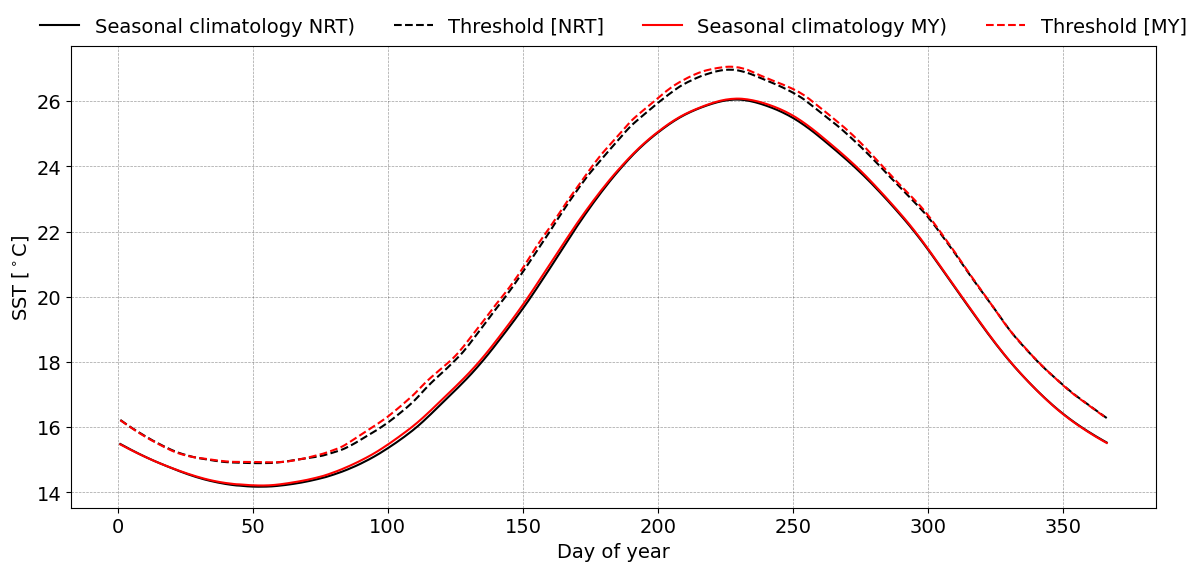

In [6]:
plt.figure(figsize=(14, 6))
plt.rc('font', size=14)

plots = [] ; labels = []
for tag, plot_col in zip(tags, ["k", "r"]):
    DS = heatwaves[tag]
    p1, = plt.plot(DS["clim"].doy, DS["clim"].seas, c=plot_col)
    p2, = plt.plot(DS["clim"].doy, DS["clim"].thresh, c=plot_col, linestyle='--')
    plots.append([p1, p2])
    labels.append([f"Seasonal climatology {tag})", f"Threshold [{tag}]"])

plt.grid(color='0.25', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend([item for sublist in plots for item in sublist], [item for sublist in labels for item in sublist],
           frameon=False, bbox_to_anchor=(0.5, 1.10), loc='upper center', ncol=4)
plt.xlabel(r'Day of year')
plt.ylabel(r'SST [$^\circ$C]')
plt.show()

<div class="alert alert-info" role="alert">

## <a id='section4'></a>4. Identifying heatwaves
[Back to top](#TOC-TOP)

</div>

In [7]:
for tag in tags:
    heatwaves[tag]["mhws"] = detect(heatwaves[tag]["SST_time_series"], heatwaves[tag]["clim"]["thresh"], heatwaves[tag]["clim"]["seas"])

In [8]:
for tag in tags:
    heatwaves[tag]["n_events"] = len(heatwaves[tag]["mhws"]["event"])
    print(f'Number of heatwaves ({tag}): {heatwaves[tag]["n_events"]}')

Number of heatwaves (NRT): 25
Number of heatwaves (MY): 31


In [9]:
ev = -1 # most recent!

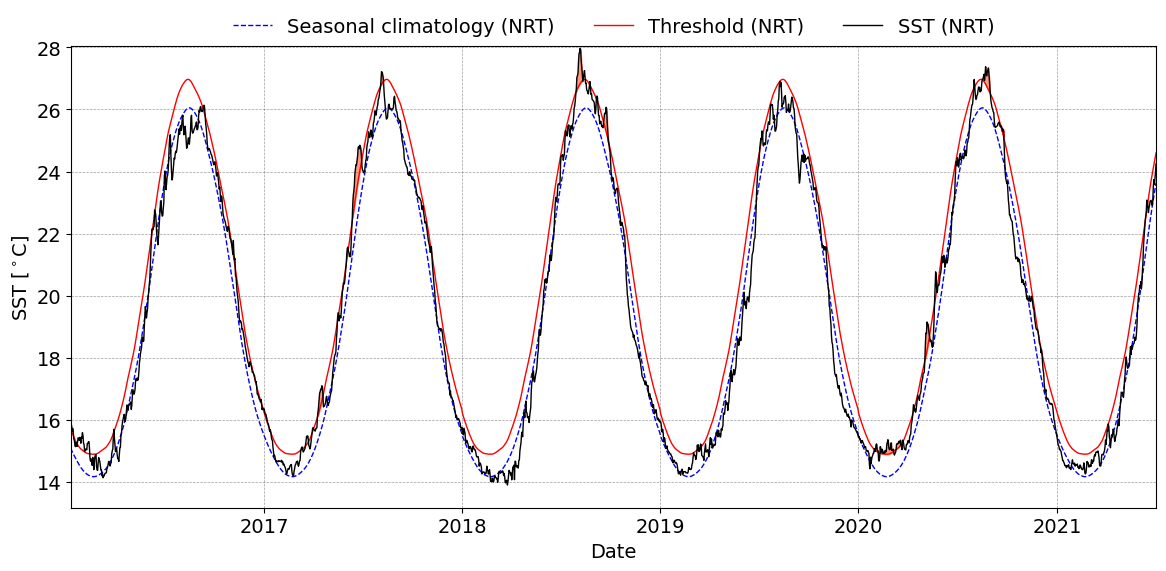

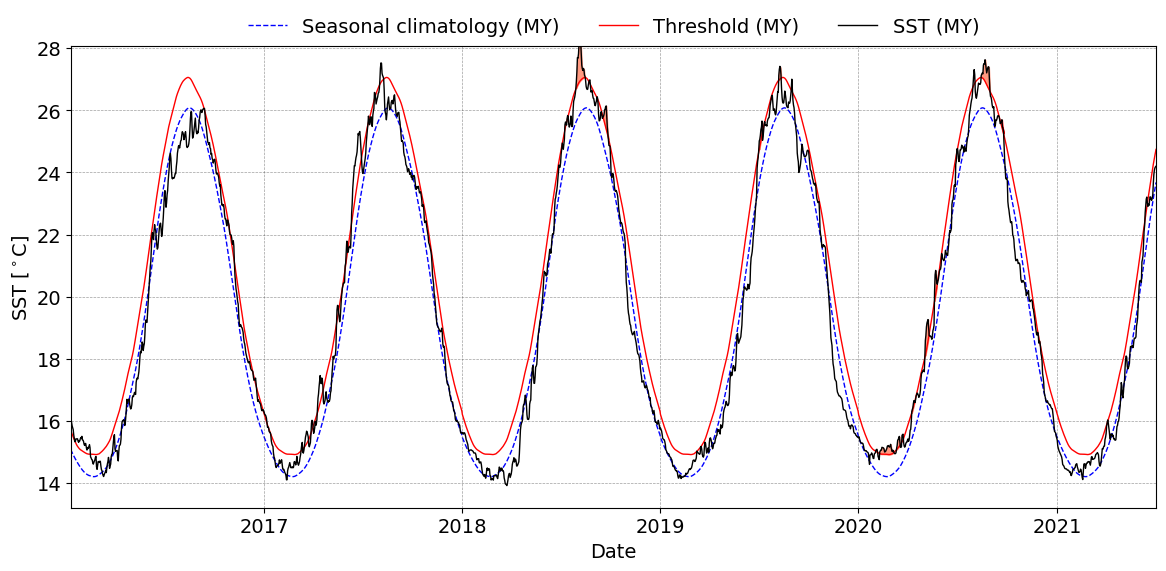

In [10]:
for tag in tags:
    
    plt.figure(figsize=(14, 6))
    plt.rc('font', size=14)
    DS = heatwaves[tag]

    p1, = plt.plot(DS["dataset"]["time"], DS["clim"]["seas"].values[DS["dataset"]["DoY"]], 'b--', linewidth=1, zorder=1)
    p2, = plt.plot(DS["dataset"]["time"], DS["clim"]["thresh"].values[DS["dataset"]["DoY"]], 'r', linewidth=1, zorder=2)
    p3, = plt.plot(DS["dataset"]["time"], DS["SST_time_series"], 'k', linewidth=1, zorder=3)
    
    # Find indices for previous MHW and shade
    for ev0 in np.arange(ev-10, min(ev+10, DS["n_events"]), 1):
        t1 = np.where(DS["dataset"]["time"]==DS["mhws"]["time_start"][ev0].values)[0][0]
        t2 = np.where(DS["dataset"]["time"]==DS["mhws"]["time_end"][ev0].values)[0][0]
        if ev0 == ev:
            plot_col = 'r'
        else:
            plot_col = (1,0.6,0.5)
        plt.fill_between(np.array(DS["dataset"]["time"][t1:t2+1]), DS["clim"]["thresh"].values[DS["dataset"]["DoY"]][t1:t2+1],
                         np.array(DS["SST_time_series"][t1:t2+1]), color=plot_col)
    
    this_history_length = min([history_length, len(DS["dataset"]["time"])])
    plt.xlim(DS["dataset"]["time"][-1* this_history_length], DS["dataset"]["time"][-1])
    plt.ylim(DS["clim"]["seas"].min() - 1, DS["clim"]["seas"].max() + 2)
    plt.grid(color='0.25', linestyle='--', linewidth=0.5, alpha=0.5)
    plt.legend([p1, p2, p3],[f"Seasonal climatology ({tag})", f"Threshold ({tag})", f"SST ({tag})"],
               frameon=False, bbox_to_anchor=(0.5, 1.1), loc='upper center', ncol=3)
    plt.xlabel(r'Date')
    plt.ylabel(r'SST [$^\circ$C]')
    
    plt.savefig(f'Marine_heat_waves_{tag}.png', bbox_inches='tight')

is a heat wave happening now is a different question to "are marine heatwaves" increasing in frequency, is a different question to "what are the effects on the biological environment"

<hr>
<a href="../../../../Index.ipynb"><< Index</a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:Copernicus.training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>